In [423]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme('notebook')
sns.set_palette('Set2')
%matplotlib inline
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [424]:
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [425]:
display(submission.head())
submission.info()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [426]:
display(test.iloc[500:505])
test.info()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
500,1072_03,Earth,False,G/160/P,TRAPPIST-1e,23.0,False,0.0,784.0,NaN,0.0,1.0,Kariel Arneras
501,1072_04,Earth,False,G/160/P,TRAPPIST-1e,40.0,False,150.0,8.0,565.0,60.0,0.0,Kencey Arneras
502,1072_05,Earth,False,G/160/P,55 Cancri e,21.0,False,699.0,0.0,0.0,0.0,18.0,Aleroy Arneras
503,1072_06,Earth,False,G/160/P,TRAPPIST-1e,17.0,False,154.0,49.0,540.0,0.0,0.0,Feline Farmonrada
504,1072_07,Earth,True,G/160/P,55 Cancri e,25.0,False,0.0,NaN,0.0,0.0,0.0,Vanney Arneras


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [427]:
display(train.head())
display(train.info())
display(train.describe())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


None

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Разведываетльный анализ данных

Transported
True     4378
False    4315
Name: count, dtype: int64

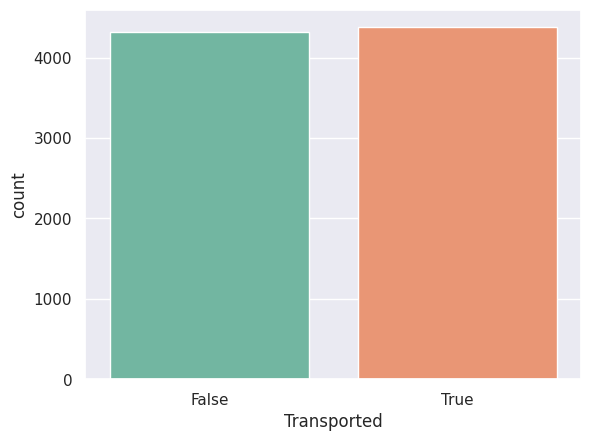

In [428]:
sns.countplot(train, x = 'Transported', palette = 'Set2');
display(train.Transported.value_counts())

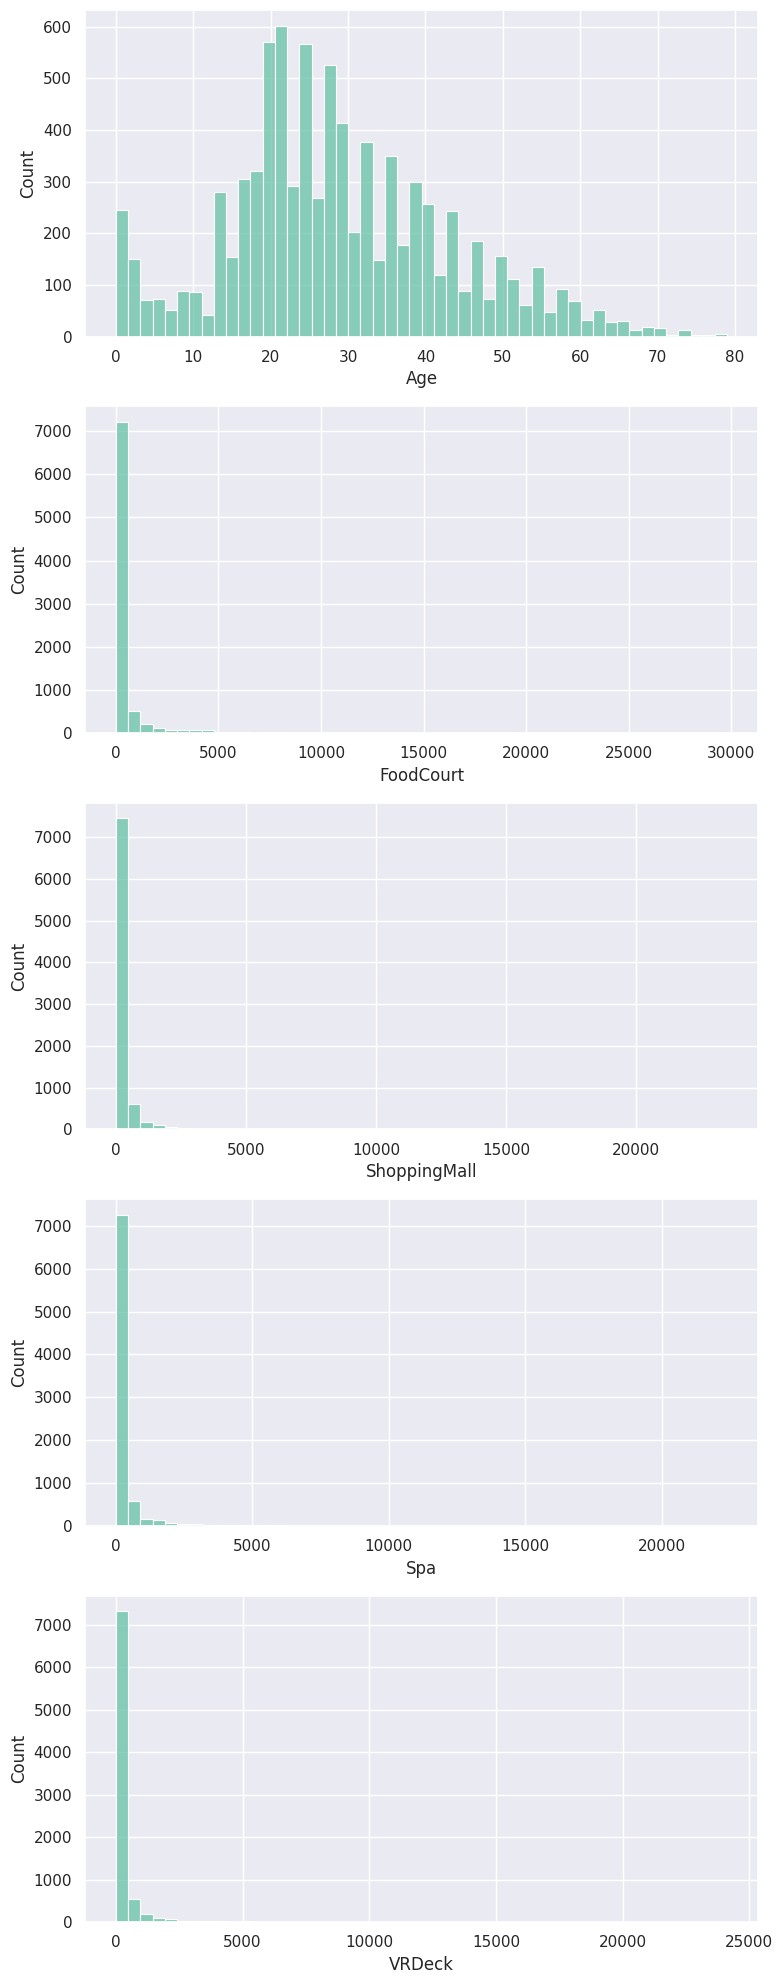

In [429]:
#Посмотрим на распределение числовых признаков

num_cols = ['Age', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']
n = len(num_cols)
fig, ax = plt.subplots(n,figsize=(8, 20))
for ind, col in enumerate(num_cols):
    sns.histplot(train[col], bins=50, ax=ax[ind]);
plt.tight_layout();

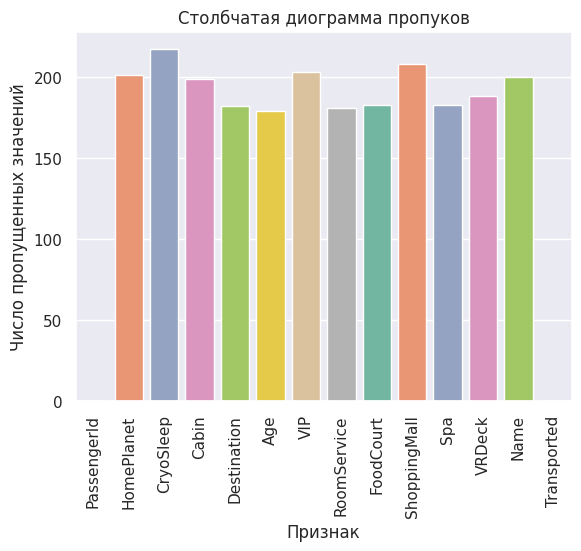

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [430]:
# проверим на наличие пропусков и дубликатов

missing_values = train.isna().sum()
sns.barplot(x=missing_values.index, y=missing_values.values, palette = 'Set2')
plt.xlabel('Признак')
plt.ylabel('Число пропущенных значений')
plt.title('Столбчатая диограмма пропуков')
plt.xticks(rotation=90)
plt.show()
display(missing_values)

In [431]:
train.duplicated().value_counts()

False    8693
Name: count, dtype: int64

## Очистка данных

In [432]:
# избавимся от бесполезных признаков 'Name' и 'PassengerId'

train = train.drop(columns=['Name','PassengerId'])

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
CryoSleep,,,,,
False,350.146772,713.004316,270.586504,486.09294,475.716165
True,0.000000,0.000000,0.000000,0.00000,0.000000


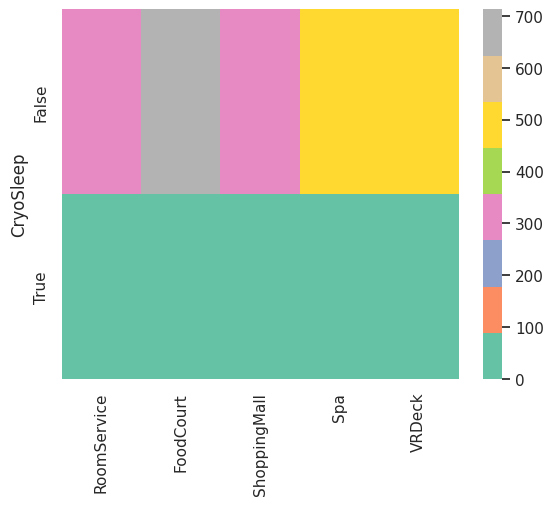

In [433]:
# избимся от пропусков в 'CryoSleep'

money_list = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
group_data = train.groupby('CryoSleep')[money_list].mean()
sns.heatmap(group_data, cmap = 'Set2');
display(group_data)

In [434]:
train['CryoSleep'] = train.apply(lambda x: True if x['FoodCourt'] == 0 
                                 and x['ShoppingMall'] == 0
                                 and x['RoomService'] == 0 
                                 and x['Spa'] == 0 
                                 and x['VRDeck'] == 0 and x['CryoSleep'] is np.NaN
                                 else(False if x['CryoSleep'] is np.NaN else x['CryoSleep'])
                                 ,axis=1)

In [435]:
# избимся от пропусков в 'VIP'
train['VIP'] = train['VIP'].fillna(False)

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
VIP,,,,,
False,0.0,0.0,0.0,0.0,0.0
True,0.0,287.0,0.0,39.0,30.0


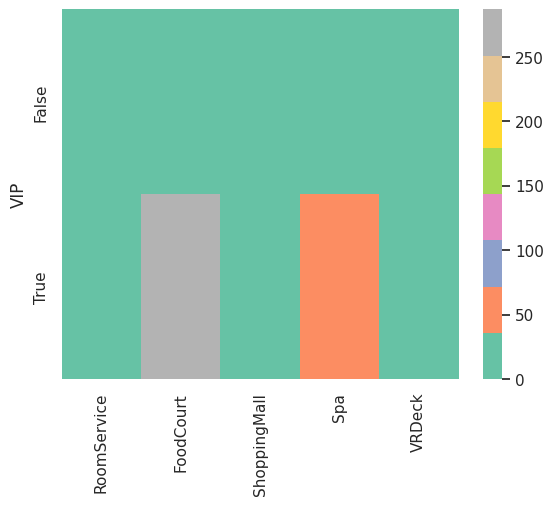

In [436]:
# избимся от пропусков в 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

group_data = train.groupby('VIP')[money_list].median()
sns.heatmap(group_data, cmap = 'Set2');
display(group_data)

In [437]:
for col in money_list:
    train[col] = train[col].fillna(train.groupby('VIP')[col].transform('median'))

In [438]:
# избимся от пропусков в 'Age'

age_mean = train['Age'].mean()
train['Age'] = train['Age'].fillna(age_mean)

In [439]:
# избимся от пропусков в 'Destination' и 'HomePlanet'

destination_mp =  train['Destination'].mode()[0]
train['Destination'] = train['Destination'].fillna(destination_mp)

HomePlanet_mp =  train['HomePlanet'].mode()[0]
train['HomePlanet'] = train['HomePlanet'].fillna(HomePlanet_mp)

In [440]:
# избавимся от пропусков в 'Cabin'

train['Cabin'] = train['Cabin'].fillna('0/0/0')

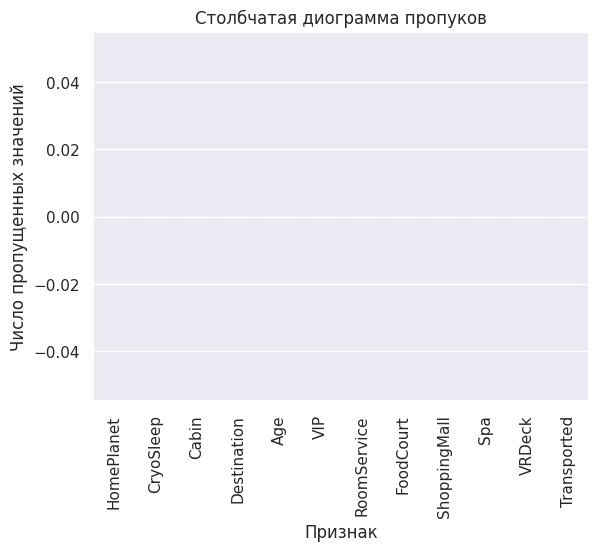

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [441]:
missing_values = train.isna().sum()
sns.barplot(x=missing_values.index, y=missing_values.values, palette = 'viridis')
plt.xlabel('Признак')
plt.ylabel('Число пропущенных значений')
plt.title('Столбчатая диограмма пропуков')
plt.xticks(rotation=90)
plt.show()
display(missing_values)

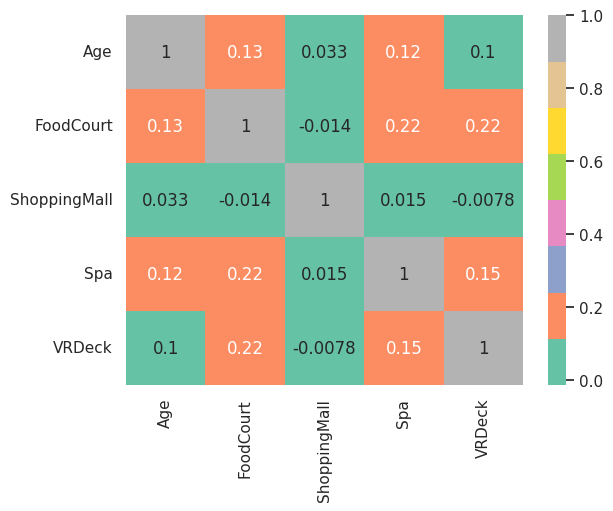

In [442]:
corr = train[['Age', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']].corr()
fig = plt.figure()
sns.heatmap(corr, annot = True, cmap = 'Set2');

In [443]:
# избавимся от выбросов в числовых признаках

def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return cleaned

for col in num_cols:
        train = outliers_z_score(train, col, log_scale=False)


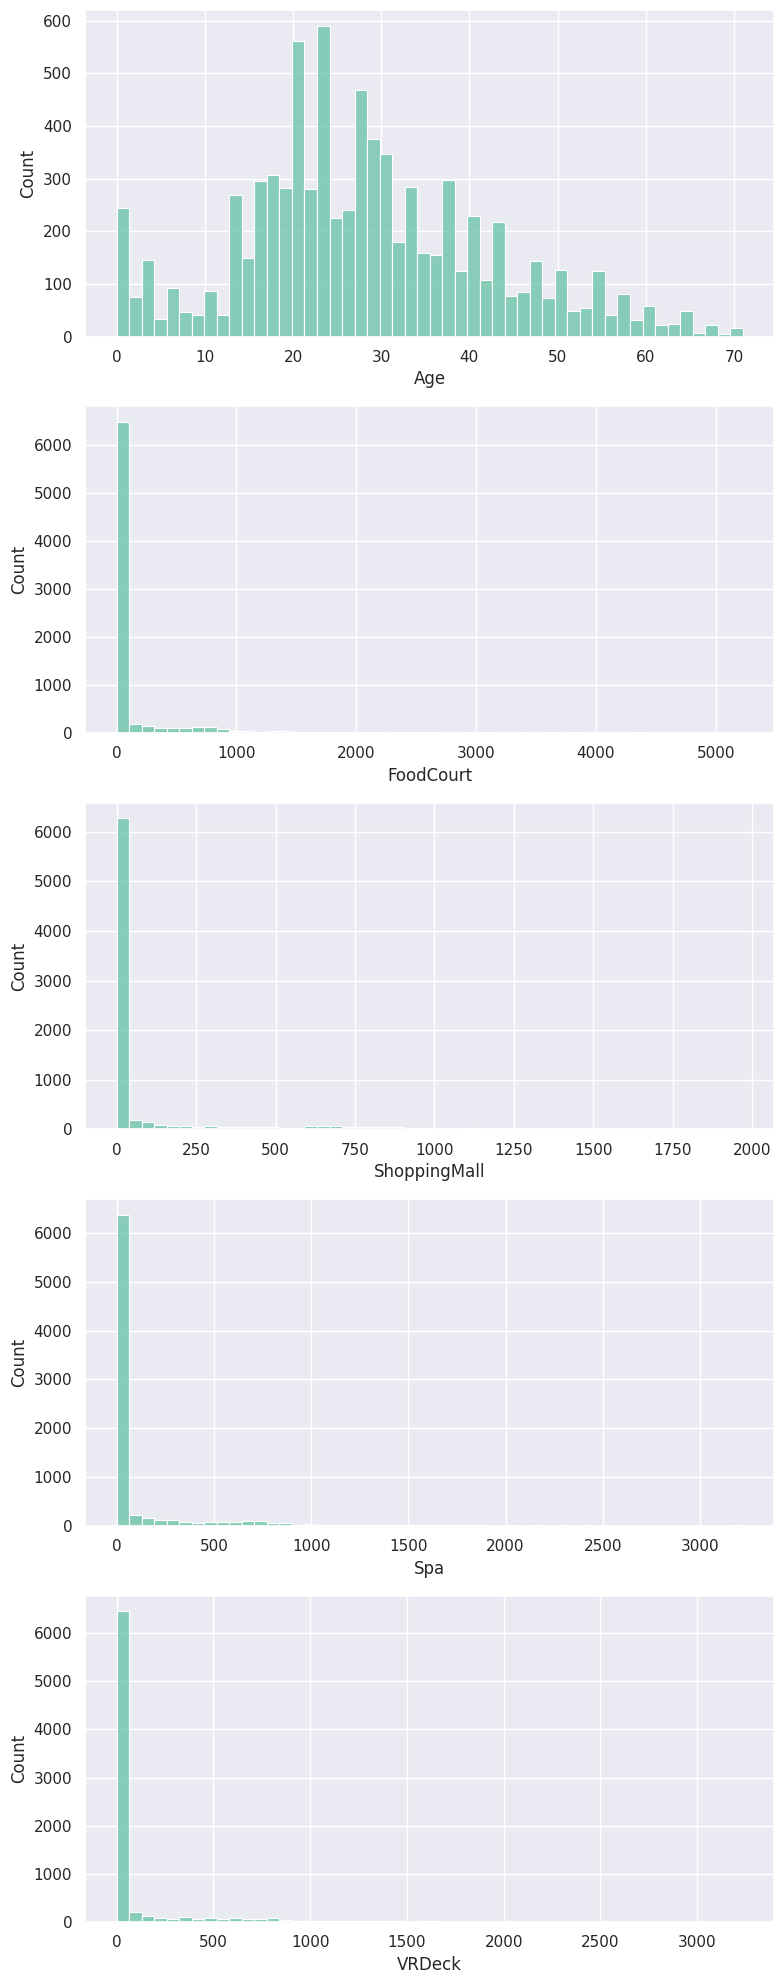

In [444]:
# прологарифмируем признаки
#log_cols = ['FoodCourt', 'ShoppingMall', 'Spa','VRDeck']
#for col in log_cols:
#    train[col] = np.log(train[col])

# визуализация
num_cols = ['Age', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']
n = len(num_cols)

fig, ax = plt.subplots(n,figsize=(8, 20))
for ind, col in enumerate(num_cols):
        sns.histplot(train[col], bins=50, ax=ax[ind]);
plt.tight_layout();

In [445]:
# выведем новые признаки из 'Cabin' и сразу же избавимся от него

train[['Deck', 'Cabin_num', 'Side']] = train['Cabin'].str.split('/', expand=True)
train = train.drop(columns = 'Cabin')

## Кодирование признаков

In [446]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8051 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8051 non-null   object 
 1   CryoSleep     8051 non-null   bool   
 2   Destination   8051 non-null   object 
 3   Age           8051 non-null   float64
 4   VIP           8051 non-null   bool   
 5   RoomService   8051 non-null   float64
 6   FoodCourt     8051 non-null   float64
 7   ShoppingMall  8051 non-null   float64
 8   Spa           8051 non-null   float64
 9   VRDeck        8051 non-null   float64
 10  Transported   8051 non-null   bool   
 11  Deck          8051 non-null   object 
 12  Cabin_num     8051 non-null   object 
 13  Side          8051 non-null   object 
dtypes: bool(3), float64(6), object(5)
memory usage: 778.4+ KB


In [447]:
# кодируем признаки типа object 
encoder = OneHotEncoder(use_cat_names=True)
one_hot_cols = pd.DataFrame(encoder.fit_transform(train[['HomePlanet', 'Destination', 'Deck', 'Side']]))
train = pd.concat([train, one_hot_cols], axis=1)

train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x))

# кодируем признаки типа bool 
cols = ['CryoSleep', 'VIP']
for col in cols:
    train[col] = train[col].apply(lambda x: 1 if x is True else 0)

In [448]:
train = train.drop(columns=['HomePlanet', 'Destination', 'Deck', 'Side', 'Side_0', 'Deck_0'])

In [449]:
display(train.info())
display(train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 8051 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8051 non-null   int64  
 1   Age                        8051 non-null   float64
 2   VIP                        8051 non-null   int64  
 3   RoomService                8051 non-null   float64
 4   FoodCourt                  8051 non-null   float64
 5   ShoppingMall               8051 non-null   float64
 6   Spa                        8051 non-null   float64
 7   VRDeck                     8051 non-null   float64
 8   Transported                8051 non-null   bool   
 9   Cabin_num                  8051 non-null   int64  
 10  HomePlanet_Europa          8051 non-null   int64  
 11  HomePlanet_Earth           8051 non-null   int64  
 12  HomePlanet_Mars            8051 non-null   int64  
 13  Destination_TRAPPIST-1e    8051 non-null   int64  
 1

None

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Europa,...,Deck_B,Deck_F,Deck_G,Deck_E,Deck_D,Deck_C,Deck_A,Deck_T,Side_P,Side_S
count,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,...,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000,8051.000000
mean,0.387033,28.230191,0.018383,220.231648,239.103341,121.396472,149.813812,146.062477,612.977891,0.202087,...,0.076388,0.339088,0.313377,0.103838,0.052664,0.065706,0.025835,0.000497,0.484163,0.493231
std,0.487101,14.188233,0.134340,644.491967,715.611957,306.891590,417.406271,409.699491,517.139932,0.401581,...,0.265634,0.473429,0.463895,0.305069,0.223376,0.247783,0.158654,0.022286,0.499780,0.499985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,456.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,37.000000,0.000000,44.000000,16.000000,17.000000,20.000000,12.000000,1020.500000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,71.000000,1.000000,14327.000000,5225.000000,1970.000000,3220.000000,3235.000000,1894.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Нормализация данных

In [450]:
# нормализация
scaler = MinMaxScaler()

for col in train.columns:
    if col == 'Transported':
        pass
    else:
        x = pd.DataFrame(train[col].copy())
        train[col] = scaler.fit_transform(x)

train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,...,Deck_B,Deck_F,Deck_G,Deck_E,Deck_D,Deck_C,Deck_A,Deck_T,Side_P,Side_S
0,0.0,0.549296,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,False,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.338028,0.0,0.007608,0.001722,0.012690,0.170497,0.013601,True,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.225352,0.0,0.021149,0.013397,0.076650,0.175466,0.000618,True,0.000528,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.619718,0.0,0.000000,0.092440,0.000000,0.090373,0.000000,True,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.366197,0.0,0.002932,0.294545,0.001523,0.000000,0.000000,True,0.001056,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Построение модели 

In [451]:
X = train.drop(columns='Transported')
y = train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, test_size = 0.25)

In [452]:
model = RandomForestClassifier()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy: ', round(metrics.accuracy_score(y_test, y_pred),3))
print('Precision: ', round(metrics.precision_score(y_test, y_pred),3))
print('Recall: ', round(metrics.recall_score(y_test, y_pred),3))

Accuracy:  0.79
Precision:  0.81
Recall:  0.755


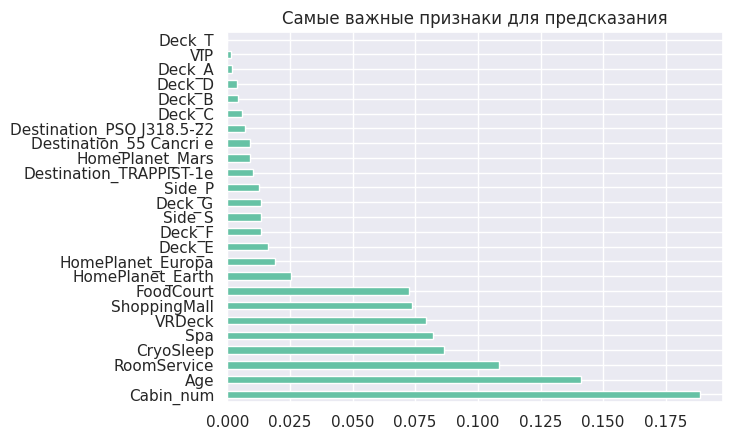

In [453]:
# выводим самые важные признаки для модели
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.title('Самые важные признаки для предсказания')
fig.show()

In [454]:
feat_importances.nlargest(10)

Cabin_num            0.188465
Age                  0.141329
RoomService          0.108521
CryoSleep            0.086625
Spa                  0.081968
VRDeck               0.079145
ShoppingMall         0.073879
FoodCourt            0.072709
HomePlanet_Earth     0.025357
HomePlanet_Europa    0.019243
dtype: float64

In [455]:
test = test.drop(columns=['Name','PassengerId'])

test['CryoSleep'] = test.apply(lambda x: True if x['FoodCourt'] == 0 
                                 and x['ShoppingMall'] == 0
                                 and x['RoomService'] == 0 
                                 and x['Spa'] == 0 
                                 and x['VRDeck'] == 0 and x['CryoSleep'] is np.NaN
                                 else(False if x['CryoSleep'] is np.NaN else x['CryoSleep'])
                                 ,axis=1)

test['VIP'] = test['VIP'].fillna(False)

money_list = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in money_list:
    test[col] = test[col].fillna(test.groupby('VIP')[col].transform('median'))
    
age_mean = test['Age'].mean()
test['Age'] = test['Age'].fillna(age_mean)

destination_mp =  test['Destination'].mode()[0]
test['Destination'] = test['Destination'].fillna(destination_mp)

HomePlanet_mp =  test['HomePlanet'].mode()[0]
test['HomePlanet'] = test['HomePlanet'].fillna(HomePlanet_mp)

test['Cabin'] = test['Cabin'].fillna('0/0/0')

test[['Deck', 'Cabin_num', 'Side']] = test['Cabin'].str.split('/', expand=True)
test = test.drop(columns = 'Cabin')

encoder = OneHotEncoder(use_cat_names=True)
one_hot_cols = pd.DataFrame(encoder.fit_transform(test[['HomePlanet', 'Destination', 'Deck', 'Side']]))
test = pd.concat([test, one_hot_cols], axis=1)

test['Cabin_num'] = test['Cabin_num'].apply(lambda x: int(x))

# кодируем признаки типа bool 
cols = ['CryoSleep', 'VIP']
for col in cols:
    test[col] = test[col].apply(lambda x: 1 if x is True else 0)

test = test.drop(columns=['HomePlanet', 'Destination', 'Deck', 'Side', 'Side_0', 'Deck_0'])

scaler = MinMaxScaler()
for col in test.columns:
    if col == 'Transported':
        pass
    else:
        x = pd.DataFrame(test[col].copy())
        test[col] = scaler.fit_transform(x)

In [456]:
display(submission.shape)
display(test.shape)

(4277, 2)

(4277, 25)

In [457]:
test = test[X.columns]
submission_pred = model.predict(test)
submission['Transported'] = submission_pred
submission.head()
submission_pred

array([ True, False,  True, ...,  True, False, False])

In [458]:
submission.to_csv('submission.csv', index=False)